Step-1: Load NSL-KDD Dataset

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [28]:
import pandas as pd

# Path to your extracted file
file_path = r"C:\Users\madhu\OneDrive\Desktop\jupyter projects\jupy info\KDDTest+.txt"

# Load dataset
df = pd.read_csv(file_path, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


✅ Step-2: Assign the 41 Feature Names
NSL-KDD has 41 features + 1 label

In [29]:
# 41 features
feature_names = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes",
    "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
    "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
    "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
    "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
    "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]

# Add attack label and difficulty_level
columns = feature_names + ["attack", "difficulty_level"]

# Assign column names
df.columns = columns

df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


Step-3: Map Raw Attack Labels → Attack Categories

In [30]:
# Define categories for mapping
dos_attacks = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 
               'mailbomb', 'processtable', 'udpstorm', 'worm']

probe_attacks = ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']

r2l_attacks = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster',
               'warezclient', 'spy', 'xlock', 'xsnoop', 'snmpgetattack', 'snmpguess',
               'httptunnel', 'sendmail', 'named']

u2r_attacks = ['rootkit', 'perl', 'loadmodule', 'ps', 'sqlattack', 'buffer_overflow']


Mapping function


In [31]:
# Function to map raw attack labels to broader categories
def map_attack_category(label):
    if label in dos_attacks:
        return "DoS"
    elif label in probe_attacks:
        return "Probe"
    elif label in r2l_attacks:
        return "R2L"
    elif label in u2r_attacks:
        return "U2R"
    else:
        return "Normal"


In [32]:
df["attack_category"] = df["attack"].apply(map_attack_category)
df[["attack", "attack_category"]].head()


,attack,attack_category
0,neptune,DoS
1,neptune,DoS
2,normal,Normal
3,saint,Probe
4,mscan,Probe


In [33]:
df["binary_label"] = df["attack_category"].apply(lambda x: 0 if x == "Normal" else 1)


In [34]:
df.shape


(22544, 45)

In [35]:
df["attack"].value_counts()


attack
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

In [36]:
df["attack_category"] = df["attack"].apply(map_attack_category)

df[["attack", "attack_category"]].head()


,attack,attack_category
0,neptune,DoS
1,neptune,DoS
2,normal,Normal
3,saint,Probe
4,mscan,Probe


In [37]:
df.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,binary_label
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965,0.568666
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361,0.495274
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000,1.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [38]:
df.describe(include="object")


,protocol_type,service,flag,attack,attack_category
count,22544,22544,22544,22544,22544
unique,3,64,11,38,5
top,tcp,http,SF,normal,Normal
freq,18880,7853,14875,9711,9724


In [39]:
df["attack_category"].value_counts()


attack_category
Normal    9724
DoS       7460
R2L       2885
Probe     2421
U2R         54
Name: count, dtype: int64

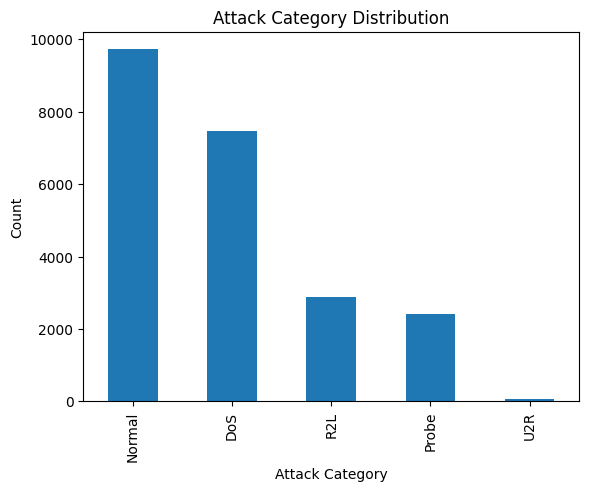

In [40]:
import matplotlib.pyplot as plt

df["attack_category"].value_counts().plot(kind="bar")
plt.xlabel("Attack Category")
plt.ylabel("Count")
plt.title("Attack Category Distribution")
plt.show()


week 2 Handle Missing Values

In [41]:
#Check missing values
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Remove Duplicates

In [42]:
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)


After removing duplicates: (22544, 45)


Drop Irrelevant Features

Common irrelevant columns in NSL-KDD / KDD99-type datasets:

num_outbound_cmds (always 0)

is_host_login (always 0)

Unnamed columns

In [43]:
irrelevant = ["num_outbound_cmds", "is_host_login"]

df.drop(columns=[col for col in irrelevant if col in df.columns], inplace=True)
print("After dropping irrelevant columns:", df.shape)


After dropping irrelevant columns: (22544, 43)


In [44]:
# Encode Categorical Features

#Identify categorical columns:

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['protocol_type', 'service', 'flag', 'attack', 'attack_category']

In [45]:
# Handle missing values safely
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

print("Missing values handled successfully")


Missing values handled successfully


In [46]:

# Separate features and target
X = df.drop(["attack", "attack_category", "binary_label"], axis=1)
y = df["attack_category"]   # or use binary_label for binary classification

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline & 📌 This is the line where normalization happens:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols), 
         
         
          # scale numeric
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)  # encode categorical
    ]
)

# Apply transformation
X_processed = preprocessor.fit_transform(X)

print("Shape after preprocessing:", X_processed.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Shape after preprocessing: (22544, 115)
Train shape: (18035, 115)
Test shape: (4509, 115)


In [47]:
type(X_train)


numpy.ndarray

In [48]:
# Keep X as a DataFrame
X = df.drop(["attack", "attack_category", "binary_label"], axis=1)
y = df["attack_category"]

# Train-test split (X remains a DataFrame)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [49]:

categorical_cols = ["protocol_type", "service", "flag"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)


## Splitting the dataset into Train and Test Sets
80% Training data

20% Testing data

In [50]:
X_train_processed = preprocessor.fit_transform(X_train)  
X_test_processed = preprocessor.transform(X_test)

print("Processed train shape:", X_train_processed.shape)
print("Processed test shape:", X_test_processed.shape)


Processed train shape: (18035, 115)
Processed test shape: (4509, 115)


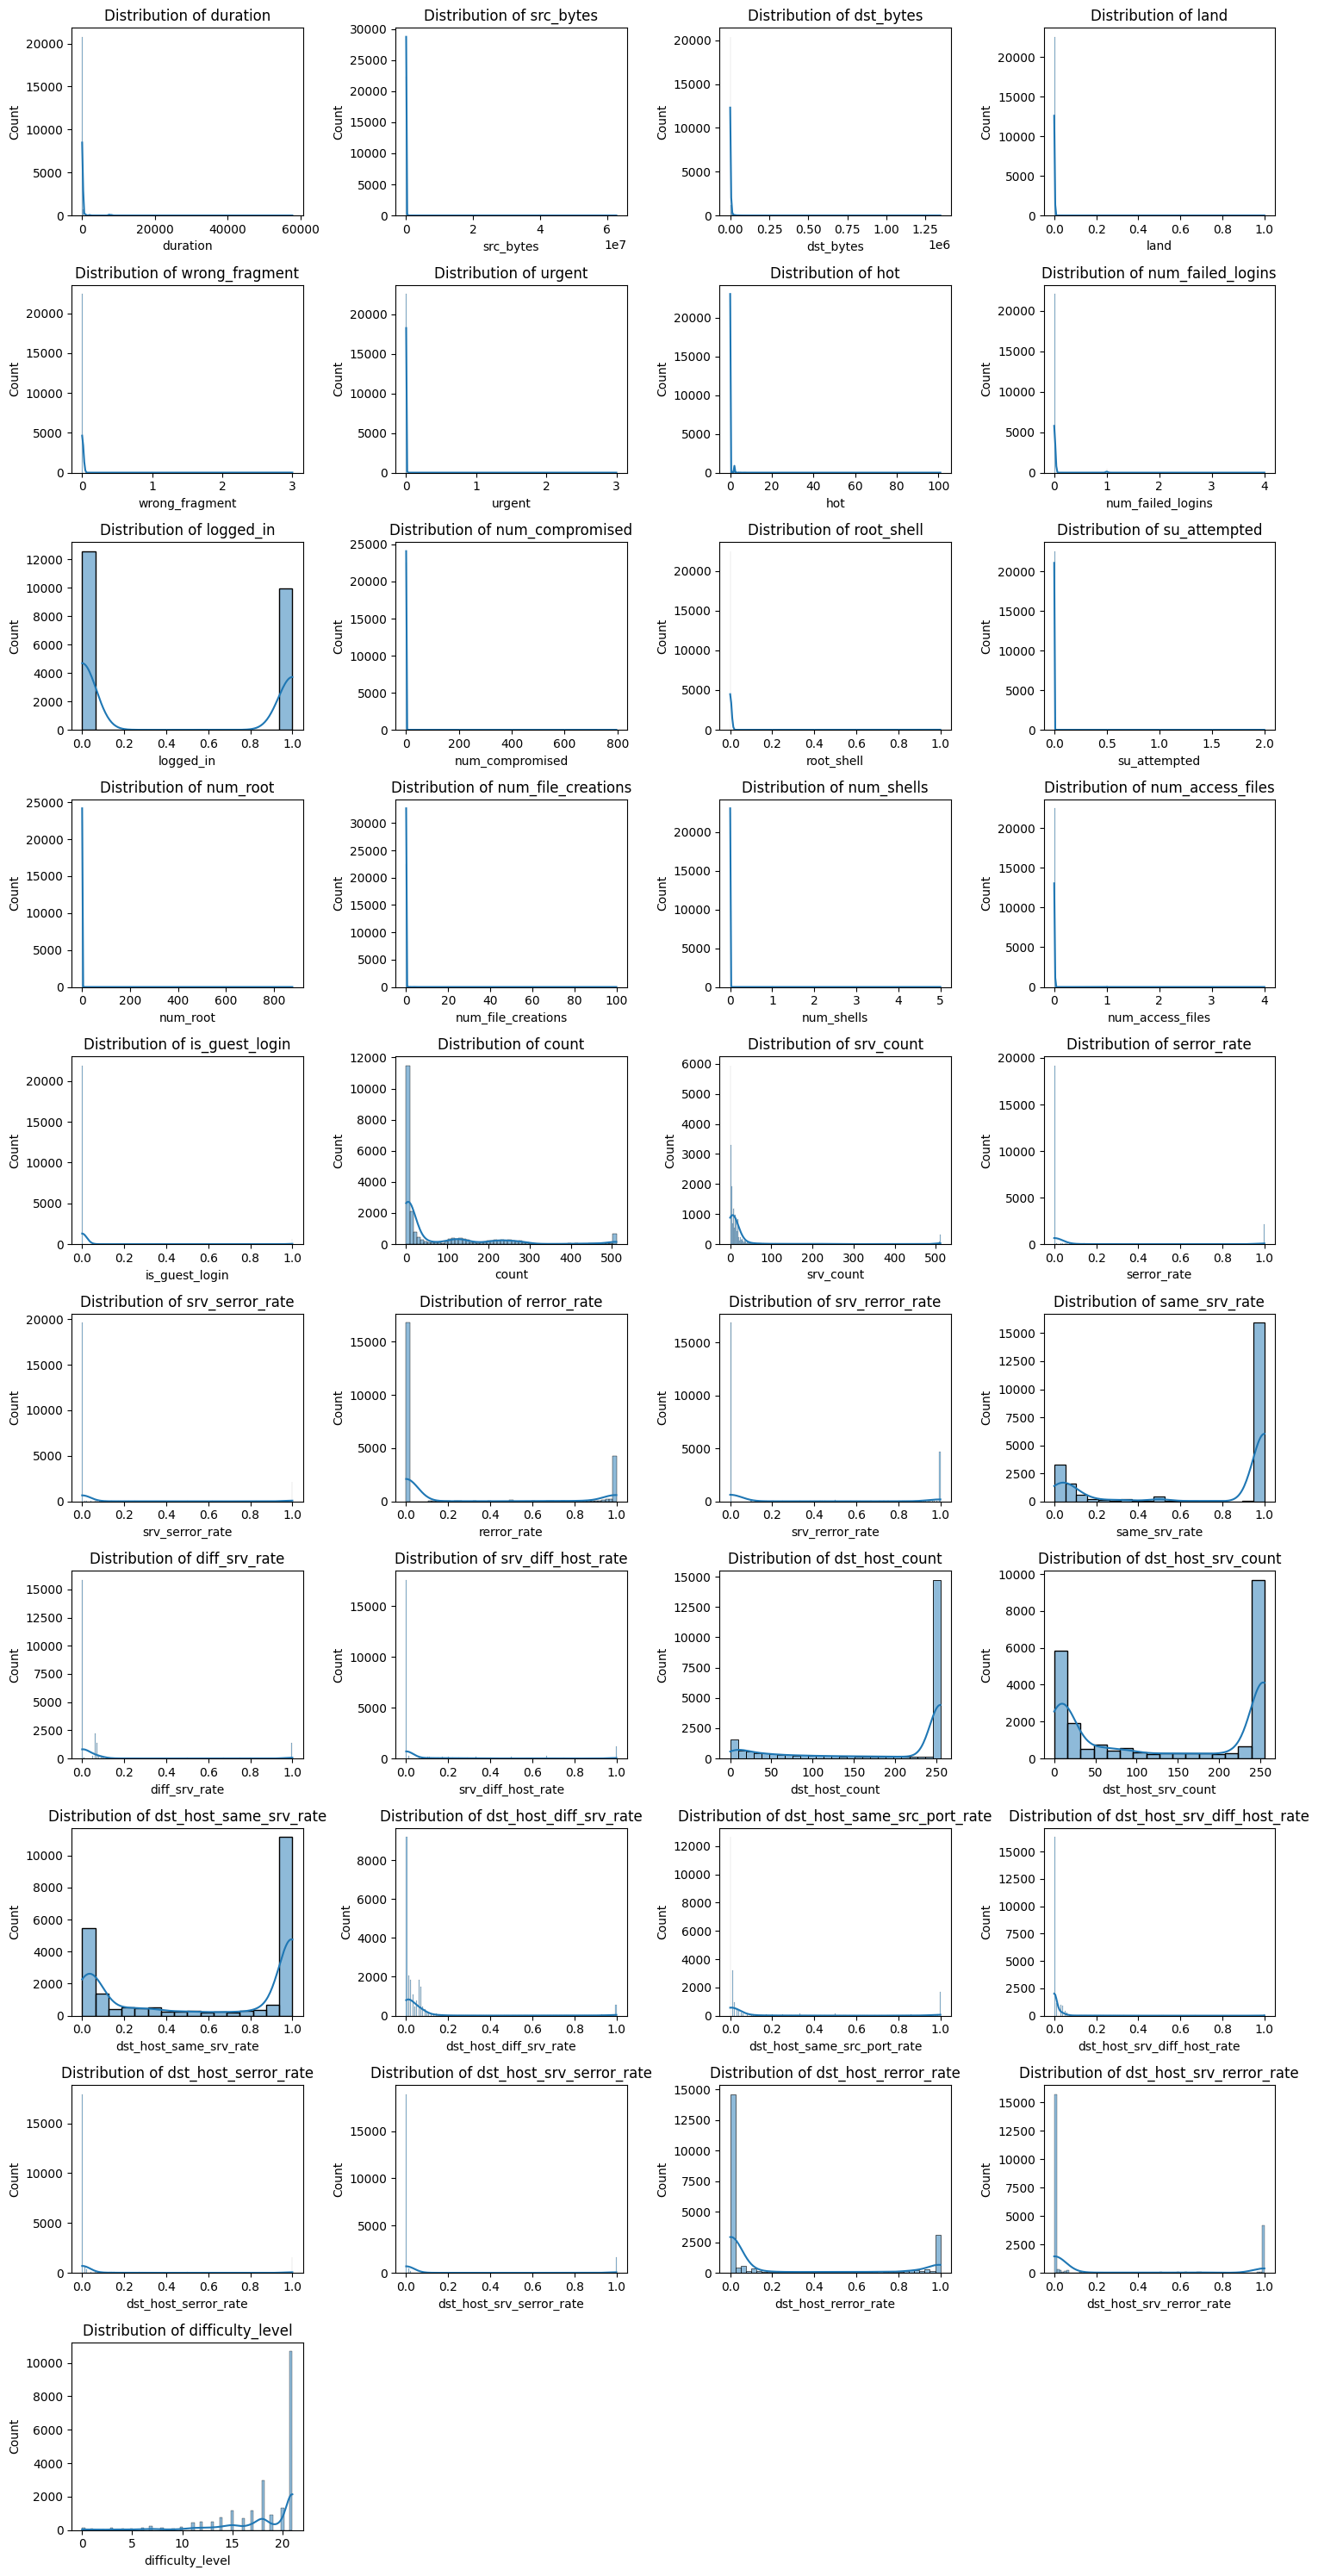

In [52]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

n_cols = 4  # number of columns in subplot grid
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(15, n_rows * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



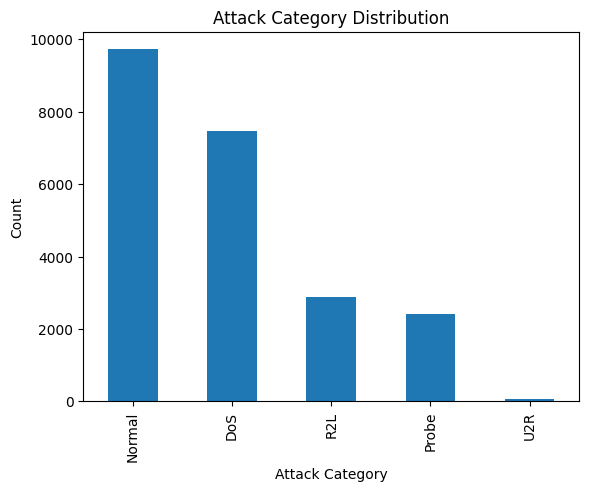

In [ ]:
import matplotlib.pyplot as plt

df["attack_category"].value_counts().plot(kind="bar")
plt.xlabel("Attack Category")
plt.ylabel("Count")
plt.title("Attack Category Distribution")
plt.show()


SUMMARY FOR MILESTONE :


PROJECT SUMMARY (Dataset Understanding → Preprocessing → Visualization → Encoding → Scaling → Train-Test Split)
1. Loaded the Dataset

You imported your dataset into a pandas DataFrame (DF) and inspected:

Number of rows & columns

Basic structure (head, info, describe)

Types of features: numeric + categorical

This helps understand what preprocessing is required.

2. Understood Dataset Structure identified:

Numeric features (e.g., duration, src_bytes, dst_bytes…)

Categorical features (e.g., protocol_type, service, flag…)

Target variable (attack vs normal)

3. Basic Statistics

computed summary statistics:

Mean, Min, Max

Standard deviation

Quantiles

Missing values count

Duplicate rows count

This helps spot outliers, missing data, and inconsistencies.

4. Data Cleaning

You performed:

✔ Handling missing values (fill/remove)
✔ Removing duplicate rows
✔ Dropping irrelevant features
✔ Resetting DataFrame index

5. Data Visualization

Encoding Categorical Columns

Since ML models require numbers, you applied:

One-Hot Encoding using ColumnTransformer
ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])


✔ Converts categorical features into binary columns
✔ Keeps numeric features scaled
✔ Works inside a pipeline

7. Feature Scaling



StandardScaler()

This converts all numeric data into:

mean = 0

std = 1

Helps models like SVM / Logistic Regression perform better.

8. Train-Test Split

Finally, you split the dataset:

train_test_split(X, y, test_size=0.2, random_state=42)


✔ 80% for training
✔ 20% for testing


